<a target="_blank" href="https://colab.research.google.com/github/trendinafrica/TReND-CaMinA/blob/main/notebooks/Rwanda24/16-Tue-DynSys/SOLVED_MultivariableDynamicalSystems.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Multi-variable dynamical systems

In the examples we've seen so far, the **state** of a simple neuron is defined by the value of its membrane potential $V$; the state of a population of bacteria is defined by the number of bacteria, etc. In each case, a single number.

However, most physical systems are defined by multiple variables. In physics, position and velocity are both needed to describe a system of particles. In ecology, multiple populations interact together.

## Linear case: dynamics of love affairs
This section is heavily inspired to S. Strogatz's wonderful textbook *Nonlinear Dynamics and Chaos*.

Imagine two lovers, say Romeo and Juliet. Let's say that $R$ is the variable that describes Romeo's love (or hate, if negative) for Juliet; and $J$ describes Juliet's love for Romeo.

In the first case, we imagine the two lovers with two incompatible dating behaviours:
- Juliet is a fickle lover. The more Romeo loves her, the more Juliet wants to run away and hide. But when Romeo gets discouraged and backs off, Juliet begins to find him strangely attractive.
- Romeo, on the other hand, tends to echo her feelings: he warms up when she loves him, and grows cold when she hates him.

*What do you think will be the outcome of this situation?*

So we describe their loves evolving in time based on each other:

$$  \dot R(t) = a J(t) $$
$$  \dot J(t) = -b R(t) $$

These are also differential equations, but there's **two** interacting with each other (a **system** of equations).

Notice that we can write this also as
$$ \begin{pmatrix} \dot R \\ \dot J \end{pmatrix} = \begin{pmatrix} 0 & a \\ -b & 0 \end{pmatrix} \begin{pmatrix}  R \\ J \end{pmatrix} $$

which makes it easier to work with in the general case, because we can set $y = (R, J)$, put the parameters in a matrix $A$, and write it as a matrix multiplication, as if it were a single variable:
$$ \mathbf{\dot y} = A \mathbf{y} $$

### Let's code it up!
We begin in the same way as we did for one variable.

In [1]:
import numpy as np

# Define a few constants
dt = 0.001 # we just choose a small number
Tmax = 10 # max time
times = np.arange(0, Tmax, dt) # time goes from 0 to Tmax with increments of dt

a = 0.5
b = 1.5

A = np.array([[0, a], [-b, 0]])
y0 = np.array([1., 1.])  # the initial love values

In [2]:
def simulate(A, y0):
    # just a placeholder
    y = np.empty((len(times), 2))  # the second dimension is 2 (J and R)
    y[0] = y0

    for i in range(len(times) - 1):
        # the actual equation
        y[i+1] = y[i] + dt * A @ y[i]
        
    return y

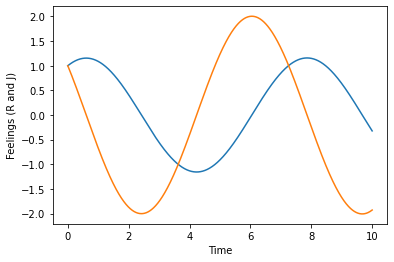

In [3]:
import matplotlib.pyplot as plt

y = simulate(A, y0)

plt.plot(times, y)
plt.xlabel("Time")
plt.ylabel("Feelings (R and J)");

### Phase spaces
But now, why don't we plot $J$ vs $R$? We don't need *time* to understand the dynamics!
The space of **states**, which here are the $(R, J)$ vectors, is called **phase space**.
We see the **trajectories** of states in the state space, so the dynamics itself!

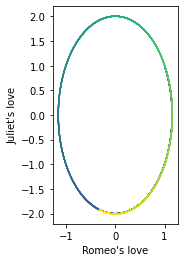

In [4]:
def plot_trajectory(A, y0):
    y = simulate(A, np.asarray(y0))
    R = y[:, 0]
    J = y[:, 1]

    plt.scatter(R, J, c=times, s=0.1)

    plt.gca().set_aspect('equal')
    plt.xlabel("Romeo's love")
    plt.ylabel("Juliet's love");
    
plot_trajectory(A, y0)

- What are we seeing here? How do we interpret this plot?
- If we change the initial condition `y0`, what happens?

### Flow fields

What if we could plot all different trajectories in phase space, for all possible values of `y0` at once?

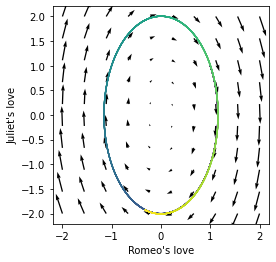

In [5]:
def plot_flow(A):
    vals = np.linspace(-2, 2, 10)
    y_vector_field = np.array(np.meshgrid(vals, vals))
    ydot_vector_field = np.inner(y_vector_field.T, A).T

    plt.quiver(*y_vector_field, *ydot_vector_field)
    plt.gca().set_aspect('equal')

    
plot_flow(A)
plot_trajectory(A, y0)

#### Experiment on all this
- Go back to the beginning and try changing $a$ and $b$. What happens?
- How do we interpret all this?
- Are there any equilibrium points in this system?

## Generalized love stories

But then, we can think of a generalized two-variable system:

$$ \begin{pmatrix} \dot R \\ \dot J \end{pmatrix} = \begin{pmatrix} a & b \\ c & d \end{pmatrix} \begin{pmatrix}  R \\ J \end{pmatrix} $$

*What's the meaning of each parameter here?*

### Cautious lovers who respond to each other
Using the code above, let's look at what happens when both Romeo and Juliet respond to each other's advances ($b=c=+1$) but are a bit "cautious" ($a=d=-0.5$).


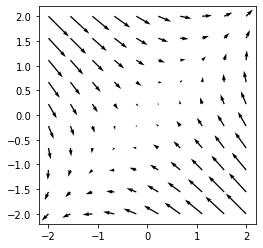

In [6]:
A = np.array([
    [-.5, 1],
    [1, -.5]
])

plot_flow(A)

What's the outcome? We can see that, depending on where we start, the arrows will either lead us to the top right, or to the bottom left. Only in very specific cases we will end up in 0.

So, mostly, Romeo and Juliet will end up either infinitely loving or infinitely hating each other.

Here is the whole panorama of possible situations we can have at fixed points in 2D systems:

![](https://wiki.ruda.city/img/fixedpoints.png)

*In which of these situations are we in the case shown above?*

## Analytical study of the equilibria

The matrix $A$ can tell us how the equilibrium will behave even before we solve anything.

The **eigenvalues** of the matrix tell us!
- If both eigenvalues are **negative**, the fixed point is **stable** from all directions (stable node)
- If both eigenvalues are **positive**, the fixed point is **unstable** from all directions (unstable node)
- If one eigenvalue is positive, and the other is negative, we have a stable and an unstable direction: this is a **saddle node**.

The corresponding **eigenvectors** tell us *which* directions in the 2D plot correspond to these.

If the eigenvalues have an **imaginary part** (they are complex numbers), then the imaginary part signifies there is a rotation:
- A **center** if there is an imaginary part, and the real part is zero
- A **stable focus** if there is an imaginary part, and the real part is negative
- An **unstable focus** if there is an imaginary part, and the real part is positive

So, if the theory is correct, for the saddle node above we should get a positive and a negative eigenvalue, with no imaginary part:

In [7]:
np.linalg.eigvals(A)

array([ 0.5, -1.5])

### Very cautious lovers
1. Using the code above, try looking at what happens when both Romeo and Juliet respond to each other's advances ($b=c=+1$) but are but are **very** "cautious" ($a=d=-2$).
2. What is the outcome of this situation? Describe it in terms of stable and unstable equilibria.
3. Try looking at the outcome for different $y_0$ to see if your interpretation is right
4. Compute the eigenvalues of the matrix. What do they tell us?

array([-1., -3.])

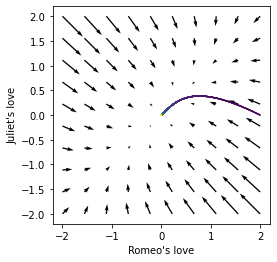

In [8]:
A = np.array([
    [-2, 1],
    [1, -2]
])

plot_flow(A)
plot_trajectory(A, (2, 0))

np.linalg.eigvals(A)

### Fickle Juliet, both cautious
1. Try looking at what happens when both Romeo and Juliet are a bit "cautious" ($a=d=-0.5$), Romeo responds to Juliet's love ($b=1$), but Juliet acts fickle as we described in the first example ($c=-1$).
2. What is the outcome of this situation? Describe it in terms of stable and unstable equilibria.
3. Try looking at the outcome for different $y_0$ to see if your interpretation is right
4. Compute the eigenvalues of the matrix. What do they tell us?

array([-0.5+1.j, -0.5-1.j])

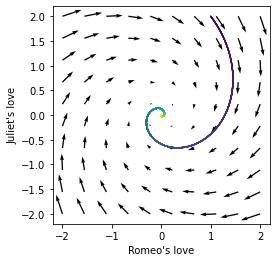

In [9]:
A = np.array([
    [-0.5, 1],
    [-1, -0.5]
])

plot_flow(A)
plot_trajectory(A, (1, 2))

np.linalg.eigvals(A)